# tmp
this is just a dump for testing

In [33]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
sys.path.insert(0, '../../icenumerics/')
sys.path.insert(0, './auxnumerics/')
sys.path.insert(0, './testing/')
import icenumerics as ice


from parameters import params
import auxiliary as aux
import montecarlo_colloids as mc

In [34]:
data_path = '../data/states/'
N = 20
ctrj = pd.read_csv(os.path.join(data_path,'ice',f'{N}.csv'),index_col='id')
particle = ice.particle(
    radius = params['particle_radius'],
    susceptibility = params['particle_susceptibility'],
    diffusion = params["particle_diffusion"],
    temperature = params["particle_temperature"],
    density = params["particle_density"]
)

trap = ice.trap(
    trap_sep = params["trap_sep"], 
    height = params["trap_height"],
    stiffness = params["trap_stiffness"]
)

params['particle'] = particle
params['trap'] = trap

col = aux.trj2col(params,ctrj)


In [31]:
col1 = col.copy(deep=True)
pps = int(N**2)
flips = [i for i in range(pps,2*pps)]
col1 = mc.flip_colloids(col1,indices=flips)

  0%|          | 0/399 [00:00<?, ?it/s]

  0%|          | 0/800 [00:00<?, ?it/s]

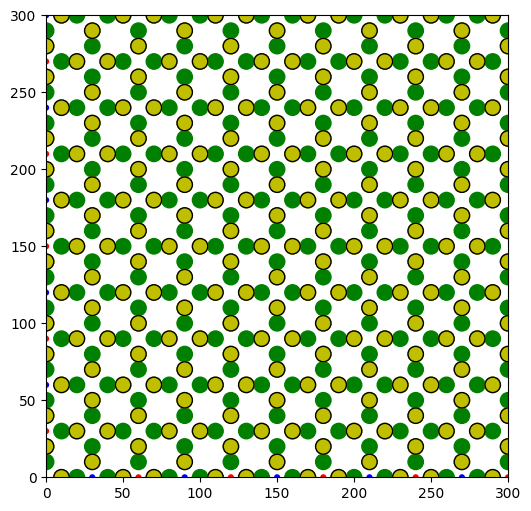

In [35]:
fig, ax = plt.subplots(figsize=(6,6))
v = ice.vertices()
v = v.colloids_to_vertices(col)
col.display(ax)
v.display(ax)
plt.show()